# Refrences

1. https://sci-hub.hkvisa.net/10.1109/Deep-ML.2019.00018    
   **DOI**: 10.1109/Deep-ML.2019.00018
  2. https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/
  **Encoding Types for Levels**


In [1]:
!pip install category_encoders
!pip install textblob

     |████████████████████████████████| 82 kB 375 kB/s 


In [13]:
import pandas as pd
courcera=pd.read_csv('/content/chadura_dataset.csv') 

print("--------------------------------Courcera Dataframe information  ----------------------------")
print(courcera.dtypes)

courcera

--------------------------------Courcera Dataframe information  ----------------------------
Id             int64
Title         object
Level         object
Categories    object
dtype: object


,Id,Title,Level,Categories
0,5,Systems Programming with Rust – IoT,Intermediate,Rust
1,3,Effective Rust Programming,beginner,Rust
2,4,Professional Rust - Ultimate edition,Advanced,Rust
3,7,Python for Bioinformatics,Beginner,Bioinformatics
4,9,R/Bioconductor for Bioinfomatics,Beginner,Bioinformatics
5,8,Julia for Bioinformatics,Beginner,Bioinformatics
6,6,Gaming - Web game development with Rust,Intermediate,Rust
7,24,Nordic Academy - Data Science Primer,beginner,Python
8,2,Rust up and Running,Beginner,Rust


In [14]:
import string
regular_punct = list(string.punctuation)
extra_punct = [
    ',', '.', '"', ':', ')', '(', '!', '?', '|', ';', "'", '$', '&',
    '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£',
    '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',
    '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', '“', '★', '”',
    '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾',
    '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', '▒', '：', '¼', '⊕', '▼',
    '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲',
    'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', '∙', '）', '↓', '、', '│', '（', '»',
    '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø',
    '¹', '≤', '‡', '√', '«', '»', '´', 'º', '¾', '¡', '§', '£', '₤','⌨','☝']

all_punct = list(set(regular_punct + extra_punct))

def remove_punctuation(text):
    text_str=str(text)
    for punc in all_punct:
        if punc in text_str:
            text_str = text_str.replace(punc, ' ')
    return (text_str.strip().lower())


#for courcera
courcera_level=[]
for level in  courcera["Level"] :  
    courcera_level.append(remove_punctuation(level))
   

print(courcera_level)


['intermediate', 'beginner', 'advanced', 'beginner', 'beginner', 'beginner', 'intermediate', 'beginner', 'beginner']


In [15]:

import pandas as pd


def encoders(data):
  encoded_level=[]
  for i in data:
    if i == 'beginner':
      encoded_level.append(0)
    elif i == 'intermediate':
      encoded_level.append(1)
    elif i == 'advanced':
      encoded_level.append(2)
  return(encoded_level)


encoded_levels=encoders(courcera_level)



encoded_levels

[1, 0, 2, 0, 0, 0, 1, 0, 0]

In [16]:
import numpy as np
feature_level=np.asarray(encoded_levels)
feature_level=feature_level.reshape(9, 1)

In [17]:
feature_level.shape
print(feature_level)

[[1]
 [0]
 [2]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]


# Knn Clustering 
## Coursera Level


In [18]:
from sklearn.cluster import KMeans
wcss_title = [] 
for i in range(1,5): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(feature_level)
    wcss_title.append(kmeans.inertia_)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  """


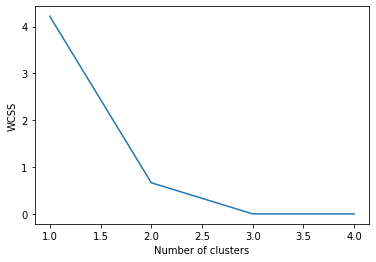

In [19]:
import matplotlib.pyplot as plt
plt.plot(range(1, 5), wcss_title)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [20]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(feature_level)
y_kmeans



array([0, 1, 2, 1, 1, 1, 0, 1, 1], dtype=int32)

In [21]:
courcera_level

['intermediate',
 'beginner',
 'advanced',
 'beginner',
 'beginner',
 'beginner',
 'intermediate',
 'beginner',
 'beginner']

# dataframe mappings 
                       Level Mapping          Cluster  Mappings

                          B >> I                  1 >> 0                   
                          I >> A                  0 >> 2
                          A >> A                  2 >> 2

In [29]:


def encode_evel(data):
    
    if data == "beginner":
      return (0)
    elif data == "intermediate":
      return(1)
    elif data == "advanced":
      return(2)
  

def select_dataset(level_mapped):
    selected_dataset=[]
    for i,pred in enumerate(y_kmeans):
      if level_mapped == pred:
        selected_dataset.append(i)
    print(selected_dataset)    
    names=[]
    levels=[]
    for i in selected_dataset:
        names.append(courcera["Title"][i])  
        levels.append(courcera["Level"][i])  

    return(names,levels)


def mapping_and_selecting(prediction):
  
  if prediction == 1:
    refer_level=0
    recommended_courses=select_dataset(refer_level)
    return(recommended_courses)
  elif prediction == 0:
    refer_level=2
    recommended_courses=select_dataset(refer_level)
    return(recommended_courses)
  elif prediction == 2:
    refer_level=2  
    recommended_courses=select_dataset(refer_level)
    return(recommended_courses)


def text_input(text):
    
    text_corrected=spellings_correct_(text)
    #lower cased
    lower_cased=remove_punctuation(text_corrected)
    #encoders
    encoded_labels=encode_evel(lower_cased)
    #list into featureset
    np_array_feature_text=np.asarray( encoded_labels)
    features_text_input=np_array_feature_text.reshape(1, 1)
    #prediction from model
    prediction=kmeans.predict(features_text_input)
    #mapping_courses
    course_map=mapping_and_selecting(prediction)
    return(course_map)

text_input("beginner")

[0, 6]


(['Systems Programming with Rust – IoT',
  'Gaming - Web game development with Rust'],
 ['Intermediate', 'Intermediate'])

In [40]:
from spellchecker import SpellChecker
def spellings_correct(text):

    spell = SpellChecker()
    corrected_words=spell.correction(text)

    return(corrected_words)

def text_input(text):

    #corrected words
    words_corrected=spellings_correct(text)
    
    text_corrected=spellings_correct_(words_corrected)
    #lower cased
    lower_cased=remove_punctuation(text_corrected)
    #encoders
    encoded_labels=encode_evel(lower_cased)
    #list into featureset
    np_array_feature_text=np.asarray( encoded_labels)
    features_text_input=np_array_feature_text.reshape(1, 1)
    #prediction from model
    prediction=kmeans.predict(features_text_input)
    #mapping_courses
    course_map=mapping_and_selecting(prediction)
    return(course_map)



text_input("intermediate")

[2]


(['Professional  Rust - Ultimate edition'], ['Advanced'])

In [1]:
# correct words
!pip install pyspellchecker

     |████████████████████████████████| 2.7 MB 5.4 MB/s 


In [43]:
from spellchecker import SpellChecker
def spellings_correct(text):

    spell = SpellChecker(language='en')
    misspelled = spell.unknown([text])
    corrected_words=""
    for word in misspelled:
        corrected_words=corrected_words+str(spell.correction(word))
        print(spell.candidates(word))
    return(corrected_words)
spellings_correct()

{'rem', 'tret', 'treu', 'prem', 'teem', 'trey', 'treme', 'tres', 'tren', 'tre', 'them', 'tram', 'trim', 'tem', 'tree', 'trom', 'term', 'tiem', 'trek', 'trei', 'tred', 'trev'}


'them'

In [3]:
help(spell)

Help on SpellChecker in module spellchecker.spellchecker object:

class SpellChecker(builtins.object)
 |  SpellChecker(language: Union[str, Iterable[str]] = 'en', local_dictionary: Union[str, NoneType] = None, distance: int = 2, tokenizer: Union[Callable[[str], Iterable[str]], NoneType] = None, case_sensitive: bool = False) -> None
 |  
 |  The SpellChecker class encapsulates the basics needed to accomplish a
 |  simple spell checking algorithm. It is based on the work by
 |  Peter Norvig (https://norvig.com/spell-correct.html)
 |  
 |  Args:
 |      language (str): The language of the dictionary to load or None for no dictionary. Supported languages are             `en`, `es`, `de`, `fr`, `pt` and `ru`. Defaults to `en`. A list of languages may be provided and all                 languages will be loaded.
 |      local_dictionary (str): The path to a locally stored word frequency dictionary; if provided, no language             will be loaded
 |      distance (int): The edit distance 